# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from pymystem3 import Mystem
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
import joblib

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

## Определяем константы

In [2]:
max_words = 10000
random_state = 42

In [20]:
main_path = "D:/Programming/PetProjects ML/Bank-text-classification/"

# Сохранение данных в csv формат

In [32]:
df.to_csv("D:/Programming/Coursers of programming 2023/Stepic/NLP от Samsung/Data/banks_v2.csv")

# Сохранение в формате pickle

In [49]:
df.to_pickle(main_path + "Data/banks_v2.pkl")

In [40]:
df.to_pickle(main_path + "Data/banks_v3.pkl")

# Работа с данными

## Чтение данных (Pickle)

In [4]:
df = pd.read_pickle(main_path + "Data/banks_v3.pkl")

## Чтение данных (CSV)

In [38]:
df = pd.read_csv(main_path + "Data/banks.csv",
                 sep='\t',
                 index_col='idx')

In [5]:
df.head()

,Score,Text,Preprocessed_texts,Sequences
idx,,,,
0,1,В Альфа-Банке работает замечательная девушка -...,"[альфа-банк, работать, замечательный, девушка,...","[0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, ..."
1,0,Оформляя рассрочку в м. Видео в меге тёплый ст...,"[оформлять, рассрочка, м., видео, мег, тёплый,...","[1, 0, 1, 0, 3, 0, 2, 3, 1, 0, 0, 0, 1, 3, 0, ..."
2,1,Очень порадовала оперативность работы в банке....,"[очень, порадовать, оперативность, работа, бан...","[5, 3, 4, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, ..."
3,0,Имела неосторожность оформить потреб. кредит в...,"[иметь, неосторожность, оформить, потреба, кре...","[4, 4, 1, 0, 0, 0, 0, 6, 0, 0, 1, 1, 1, 0, 0, ..."
4,0,Небольшая предыстория: Нашел на сайте MDM банк...,"[небольшой, предыстория, найти, сайт, mdm, бан...","[10, 12, 5, 2, 8, 3, 4, 0, 0, 0, 6, 2, 0, 0, 1..."


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13999 entries, 0 to 13998
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Score               13999 non-null  int32 
 1   Text                13999 non-null  object
 2   Preprocessed_texts  13999 non-null  object
 3   Sequences           13999 non-null  object
dtypes: int32(1), object(3)
memory usage: 492.2+ KB


## Определим переменные: стоп-слова, знаки пунктуации, MorphAnalyzer(), Mystem()

In [57]:
punktuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '«', '»', ';', '–', '--']
stopwords_ru = stopwords.words("russian")

In [58]:
morph = pymorphy3.MorphAnalyzer()
my_stem = Mystem()

## Предобработка текста с лемматизацией через pymorphy3
pymorphy3 - библиотека для лемматизации и в целом работы с русским и украинским текстами

In [53]:
def preprocess_pymorphy3(text, stop_words, punktuation_marks, morph):
    """
    
    """
    tokens = word_tokenize(text)
    preprocessed_text = []
    
    for token in tokens:
        if token not in punktuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stopwords_ru:
                preprocessed_text.append(lemma)
    return preprocessed_text

**Пример**

In [7]:
print(word_tokenize(df.Text[0][:100]))

['В', 'Альфа-Банке', 'работает', 'замечательная', 'девушка', '-', 'Ильясова', 'Орна', ',', 'вежливая', ',', 'отзывчивая', ',', 'действительно', 'уч']


In [42]:
print(preprocess_pymorphy3(df.Text[0][:100], stopwords_ru, punktuation_marks, morph))

['альфа-банк', 'работать', 'замечательный', 'девушка', 'ильясова', 'орный', 'вежливый', 'отзывчивый', 'действительно', 'уч']


## Предобработка текста с лемматизацией через pymystem3
pymystem3 - библиотека для лемматизации и не только русского текста от Яндекс

In [10]:
def preprocess_pymystem3(text, stop_words, punktuation_marks, my_stem):
    """
    
    """
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in punctuation_marks and token not in stop_words]
    # Удаляем англ слова из текста если есть
    tokens_str =re.sub(r"[A-Za-z]+", "", " ".join(tokens))

    # Лемматизация
    lemmas = my_stem.lemmatize(tokens_str)
    preprocessed_text = [token for token in my_stem.lemmatize(tokens_str) if token not in [" ", "  ", "\n"]]

    return preprocessed_text

**Пример**

In [11]:
print(preprocess_pymystem3(df.Text[0][:100], stopwords_ru, punctuation_marks, my_stem))

['альфа-банк', 'работать', 'замечательный', 'девушка', 'ильясов', 'орн', 'вежливый', 'отзывчивый', 'действительно', 'уч']


**Вывод** - pymorphy3 работает быстрее, его и будем использовать для лемматизации.

## Лемматизация всего корпуса текстов

In [43]:
df["Preprocessed_texts"] = df["Text"].apply(lambda x: preprocess_pymorphy3(x, stopwords_ru, punktuation_marks, morph))

In [44]:
for i in range(2):
    sentence = df.Preprocessed_texts.loc[i]
    print(f"Предложение {i + 1}:\n{sentence}")

Предложение 1:
['альфа-банк', 'работать', 'замечательный', 'девушка', 'ильясова', 'орный', 'вежливый', 'отзывчивый', 'действительно', 'участвовать', 'запрос', 'клиент', 'приходить', 'подряд', 'ровно', 'день', 'каждый', 'день', 'помнить', 'время', 'приход', 'помочь', 'оформить', 'кредит', 'размер', '1млн', 'рубль', 'прийти', 'партнёр', 'передавать', 'получить', 'кредит', 'покупать', 'авто', 'специалист', 'ильясова', 'орный', 'помочь', 'вывести', 'весь', 'сумма', 'день', 'это', 'непросто', 'сделка', 'состояться', 'всё', 'остаться', 'довольный', 'знакомый', 'конец', 'весь', 'добавить', 'понять', 'почему', 'прислать', 'это', 'отделение', 'девушка', 'большой', 'замечательный', 'специалист', 'приобретать', 'программа', 'здоровье', 'вообще', 'всё', 'связать', 'альфа-банк']
Предложение 2:
['оформлять', 'рассрочка', 'м.', 'видео', 'мег', 'тёплый', 'стан', 'попросить', 'менеджер', 'заявка', 'страховка', 'итог', 'подписывать', 'договор', 'договор', 'оказаться', 'лишний', '6', 'тысяча', 'менеджер'

# Создаем мешок слов (BoW)

## Реализация функции для составления BoW

In [54]:
def make_BoW(text, counter_keys):
    """
    Функция создает последовательность Bag of Words для документа (предложения)
    """
    sen = []
    for word in counter_keys:
        if word in text:
            element = text.count(word)
            sen.append(element)
        else:
            sen.append(0)
    return sen

## Создание словаря частотности слов, входящих в коллекцию документов

In [61]:
counter = Counter()
for txt in df.Preprocessed_texts:
    counter.update(txt)

**Обрезаем частотный словарь до 10000 самых частых слов**

In [62]:
counter = dict(counter.most_common(max_words))

In [63]:
counter_keys = list(counter.keys())

## Добавляем колонку с векторами (BoW) для каждого предложения в df

In [21]:
df["Sequences"] = df.Preprocessed_texts.apply(lambda x: make_BoW(x, counter_keys))

In [26]:
print(f"Первые 10 элементов BoW вектора 1-го документа:", df.Sequences[0][:10])

Первые 10 элементов BoW вектора 1-го документа: [0, 0, 2, 2, 3, 0, 0, 2, 0, 0]


## Преобразуем текстовые данные "Score" в числовые

In [30]:
df["Score"] = np.where(df.Score == "Positive", 1, 0)

In [34]:
df.Score[:5]

idx
0    1
1    0
2    1
3    0
4    0
Name: Score, dtype: int32

In [38]:
# Проверка, что нет пропусков по Score
df.Score.isna().sum()

0

# Подготовка данных к обучению

In [6]:
X = []
for i in df["Sequences"]:
    X.append(i)

In [8]:
X = np.array(X)

In [9]:
y = df["Score"].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [12]:
print(f"Размер обучающей выборки = {X_train.shape[0]} строк")

Размер обучающей выборки = 11199 строк


In [13]:
print(f"Размер тестовой выборки = {X_test.shape[0]} строк")

Размер тестовой выборки = 2800 строк


# Машинное обучение

## Модель №1 - Logistic Regression

In [14]:
lr = LogisticRegression(random_state=random_state, max_iter=500)

In [15]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [50]:
print(f"Доля правильных ответов (accuracy) на тестовом наборе данных = {lr.score(X_test, y_test) * 100:.2f}%")

Доля правильных ответов (accuracy) на тестовом наборе данных = 93.93%


**Сохранение модели на диск**

In [21]:
joblib.dump(lr, main_path + "Models/model_1.pkl")

['D:/Programming/PetProjects ML/Bank-text-classification/Models/model_1.pkl']

**Загрузка модели с диска**

In [ ]:
lr = joblib.load(main_path + "Models/model_1.pkl")

### Матрица ошибок модели №1

In [28]:
predicted = lr.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=predicted)

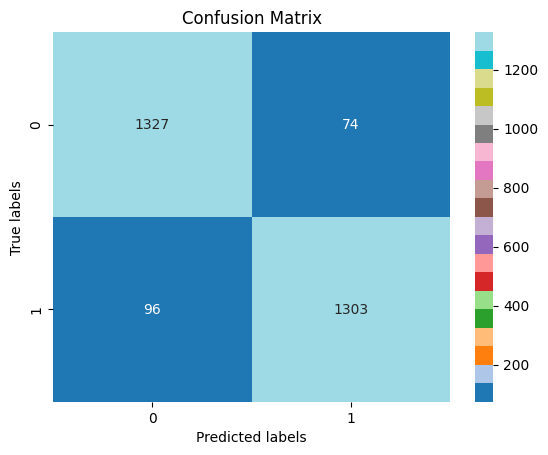

In [49]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="tab20");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

# Предсказание класса для банковского отзыва

In [65]:
def predict_class(text, model, stop_words, punktuation_marks, morph,
                  counter_keys):
    """
    
    """
    # Токенизация текста и лемматизация
    preprocessed_text = preprocess_pymorphy3(text, stop_words, punktuation_marks, morph)
    # Извлечение признаков и построение BoW (Bag of Words)
    BoW = make_BoW(preprocessed_text, counter_keys)
    
    # Предсказание класса отзыва на банк
    return model.predict([BoW])

In [72]:
pos_comment = """Всем привет. Недавно побывал в банке Сова, банк очень комфортный и красивый. Меня быстро обслужили и даже угостили кофе.
Всем рекомендую данный банк. Работают профессионалы!"""

# Предсказание класса для комментария
predicted_class = predict_class(pos_comment, lr, stopwords_ru, punktuation_marks, morph, counter_keys)

print(np.where(predicted_class == 1, "Коментарий положительный", "Коментарий отрицательный")[0])

Коментарий положительный


In [71]:
neg_comment = """Всем привет. Недавно побывал в банке Мосбанк, банк красивый, но работают очень медленно. Ждал очередь 50 минут,
так они меня еще послали домой за дополнительным документом. Потом мне подсунули кредит, который я не просил, в итоге банк не рекомендую, не тратьте время!"""

# Предсказание класса для комментария
predicted_class = predict_class(neg_comment, lr, stopwords_ru, punktuation_marks, morph, counter_keys)

print(np.where(predicted_class == 1, "Коментарий положительный", "Коментарий отрицательный")[0])

Коментарий отрицательный
